주성분 분석 : PCA
  - 고차원의 데이터를 저차원으로 축소하면서 데이터의 주요 특징을 최대한 보존처리 하는 기법


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = np.load('/content/drive/MyDrive/data/fruits_300.npy')
data.shape

(300, 100, 100)

In [5]:
from sklearn.decomposition import PCA
# 3차원 데이터를 2차원으로 변경
data_2dim = data.reshape(300, -1)
data_2dim.shape

(300, 10000)

In [12]:
# 10000 차수를 50차수로 변경
pca = PCA(n_components=100)
data_pca =  pca.fit_transform(data_2dim)
data_pca.shape, pca.components_.shape

((300, 100), (100, 10000))

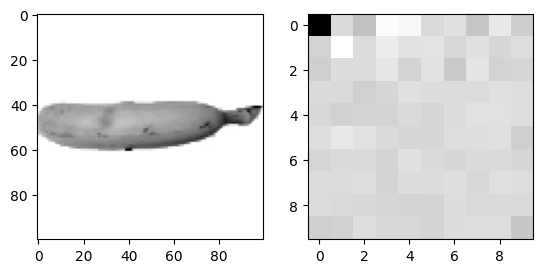

In [15]:
# 2차원데이터 원본 10000차수
# 2차원데이터를 주성분 분석으로 50차수로 조정 했을때 원본과 조정된 미지의 차이를 시각화
plt.subplot(1,2,1)
plt.imshow(data_2dim[200].reshape(100,100), cmap='gray_r')
plt.subplot(1,2,2)
plt.imshow(data_pca[200].reshape(10,10), cmap='gray_r')

LogisticRegression을 이용해서 분류 모델을개발

In [17]:
target = [0]*100 + [1]*100 + [2]*100

모델을 이용해서 예측하고 평가하는 작업대신에
  - 교차검즘을 이용해서 성능평가 미리 해 볼수 있음

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
logistic = LogisticRegression()
score = cross_validate(logistic, data_pca, target, cv=5)
score['test_score'].mean(), score['fit_time'].mean()

(1.0, 0.1257617950439453)

In [22]:
# 퍼센트로 PCA사용하기
pca = PCA(n_components=0.95)
data_pca =  pca.fit_transform(data_2dim)
print(data_pca.shape, pca.components_.shape)
logistic = LogisticRegression()
score = cross_validate(logistic, data_pca, target, cv=5)
score['test_score'].mean(), score['fit_time'].mean()

(300, 74) (74, 10000)


(1.0, 0.030172157287597656)